# Part I : Airline Passenger Satisfaction 


## by Ozurumba Chioma



## Introduction


The dataset for this project is gotten from Kaggle. It has an airline satisfaction scores for 129,880 passengers, where each record represents one passenger. The dataset consists of passenger's records such as Age, Gender, Travel class, Arrival and Departure delays etc and also factors that affect customer satisfaction such as Cleanliness, Seat comfort, Baggage etc




## Preliminary Wrangling


In [90]:
# import necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [91]:
# Load the Dataset
df = pd.read_csv('airline_passenger_satisfaction.csv')

## Assessing Data

In [92]:
# Visually assessing data
df.head()


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [93]:
df.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


## Column Description:

Customer ID - Unique passenger identifier

Gender - Gender of the passenger (Female/Male)

Age - Age of the passenger

Customer Type - Type of airline customer (First-time/Returning)

Type of Travel - Purpose of the flight (Business/Personal)

Class - Travel class in the airplane for the passenger seat

Flight Distance - Flight distance in miles

Departure Delay - Flight departure delay in minutes

Arrival Delay - Flight arrival delay in minutes

Departure and Arrival Time Convenience - Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means "not applicable"

Ease of Online Booking - Satisfaction level with the online booking experience from 1 (lowest) to 5 (highest) - 0 means "not applicable"

Check-in Service - Satisfaction level with the check-in service from 1 (lowest) to 5 (highest) - 0 means "not applicable"

Online Boarding - Satisfaction level with the online boarding experience from 1 (lowest) to 5 (highest) - 0 means "not applicable"

Gate Location - Satisfaction level with the gate location in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable"

On-board Service - Satisfaction level with the on-boarding service in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable"

Seat Comfort - Satisfaction level with the comfort of the airplane seat from 1 (lowest) to 5 (highest) - 0 means "not applicable"

Leg Room Service - Satisfaction level with the leg room of the airplane seat from 1 (lowest) to 5 (highest) - 0 means "not applicable"

Cleanliness - Satisfaction level with the cleanliness of the airplane from 1 (lowest) to 5 (highest) - 0 means "not applicable"

Food and Drink - Satisfaction level with the food and drinks on the airplane from 1 (lowest) to 5 (highest) - 0 means "not applicable"

In-flight Service - Satisfaction level with the in-flight service from 1 (lowest) to 5 (highest) - 0 means "not applicable"

In-flight Wifi Service - Satisfaction level with the in-flight Wifi service from 1 (lowest) to 5 (highest) - 0 means "not applicable"

In-flight Entertainment - Satisfaction level with the in-flight entertainment from 1 (lowest) to 5 (highest) - 0 means "not applicable"

Baggage Handling - Satisfaction level with the baggage handling from the airline from 1 (lowest) to 5 (highest) - 0 means "not applicable"

Satisfaction - Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [95]:
# rows and columns
df.shape

(129880, 24)

In [96]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [97]:
# null values in dataframe
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [98]:
#number of unique values
df.nunique()

ID                                        129880
Gender                                         2
Age                                           75
Customer Type                                  2
Type of Travel                                 2
Class                                          3
Flight Distance                             3821
Departure Delay                              466
Arrival Delay                                472
Departure and Arrival Time Convenience         6
Ease of Online Booking                         6
Check-in Service                               6
Online Boarding                                6
Gate Location                                  6
On-board Service                               6
Seat Comfort                                   6
Leg Room Service                               6
Cleanliness                                    6
Food and Drink                                 6
In-flight Service                              6
In-flight Wifi Servi

In [99]:
# duplicates in dataframe
df.duplicated().sum()

0

So far the dataset has a total of 129880 rows and 24 columns with no null and duplicate value

## Cleaning Issues

1. Arrival Delay column is float instead of int

2. Drop rows with null value

3. 'Check-in Service' column datatype is int instead of object

4. 'Food and Drink' column datatype is int instead of object datatype

5. 'In-flight Entertainment' column datatype is int instead of object datatype




In [100]:
# creating a copy
df_copy=df.copy()

In [101]:
# drop rows with no value
df_copy.dropna(inplace= True)

In [102]:
#confirming changes
df_copy.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [103]:
# converting arrival delay to int
df_copy['Arrival Delay'] = df_copy['Arrival Delay'].astype(int)

In [104]:
# confirmation
df_copy['Arrival Delay'].dtypes

dtype('int32')

In [105]:
# converting check -in service to obj
df_copy['Check-in Service']= df_copy['Check-in Service'].astype(object)

In [106]:
# confirmation
df_copy['Check-in Service'].dtypes

dtype('O')

In [107]:
# convert Food and Drink to obj
df_copy['Food and Drink'] =df_copy['Food and Drink'].astype(object)

In [108]:
# confirmation
df_copy['Food and Drink'].dtypes

dtype('O')

In [109]:
# convert In-flight Entertainment to objectb
df_copy['In-flight Entertainment']= df_copy['In-flight Entertainment'].astype(object)

In [110]:
#confirming the cleaning process
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   ID                                      129487 non-null  int64 
 1   Gender                                  129487 non-null  object
 2   Age                                     129487 non-null  int64 
 3   Customer Type                           129487 non-null  object
 4   Type of Travel                          129487 non-null  object
 5   Class                                   129487 non-null  object
 6   Flight Distance                         129487 non-null  int64 
 7   Departure Delay                         129487 non-null  int64 
 8   Arrival Delay                           129487 non-null  int32 
 9   Departure and Arrival Time Convenience  129487 non-null  int64 
 10  Ease of Online Booking                  129487 non-null 

### What is the structure of your dataset?

> The Dataset has 129,880 rows and 24 columns

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest very important in contributing t Airline passenger satisfaction is Type_of_Travel, Inflight_entertainment, Seat confort, Online_boarding

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Baggage haddling, Cleanliness, Flight_Distance etc

## Univariate Exploration

## What is the Age Distribution of the passengers?

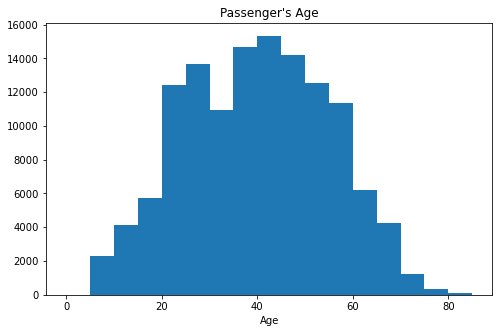

In [111]:
# histogram plot for Age distribution
binsize = 5
bins = np.arange(0, df_copy['Age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'Age', bins = bins)
plt.xlabel('Age')
plt.title("Passenger's Age")
plt.show()



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From age 7-38 and from age 16-79 the number of neutral/dissatisfied passengers is high compared to satisfied passengers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No outlier was detected.

## Were most passengers first time users or returning passengers?

Text(0.5, 1.0, 'Passenger Type')

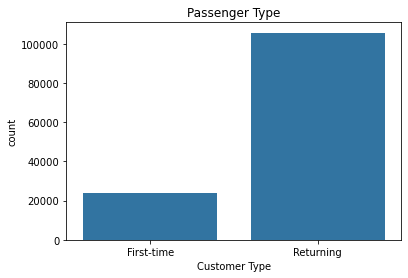

In [112]:
#plotting to check customer type (First time and Returning)
default_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x = 'Customer Type', color = default_color)
plt.xlabel('Customer Type')
plt.title('Passenger Type')

The chart shows high rate of Returning customers and low rate of first-time users

## What gender of passengers booked the most?

Text(0.5, 1.0, 'Gender of Passengers')

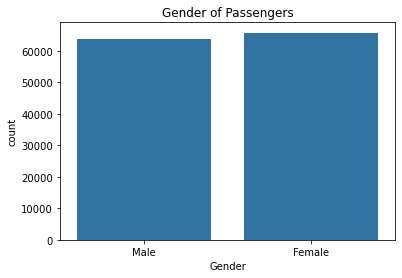

In [113]:
# Creating color scheme
default_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x = 'Gender', color = default_color)
plt.xlabel('Gender')
plt.title('Gender of Passengers')

from the chart above, it is observed that both male and female have close ratio

## what class of passenger booked the most?

Text(0.5, 1.0, 'Passenger Class')

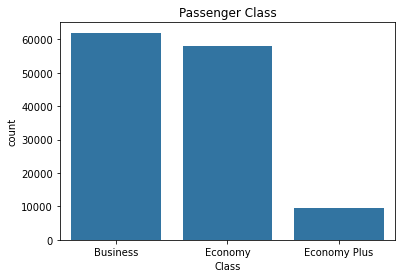

In [114]:
#Passenger class
default_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x = 'Class', color = default_color)
plt.xlabel('Class')
plt.title('Passenger Class')

Most of the passengers booked Business class, Enonomy Class was booked the least

## Passengers Satisfied or dissatisfied

Text(0.5, 1.0, 'Passenger Satisfaction')

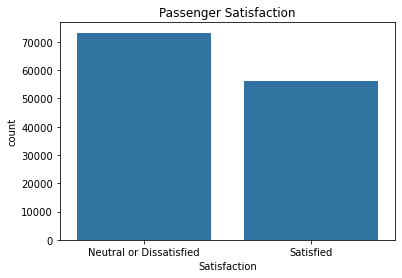

In [115]:
# Plot showing Passenger Satisfaction
default_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x = 'Satisfaction', color = default_color)
plt.xlabel('Satisfaction')
plt.title('Passenger Satisfaction')

The chart shows high rate of Dissatisfied/Neutral passengers

## Bivariate Exploration



In [116]:
numeric_vars = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']
categoric_vars = ['Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

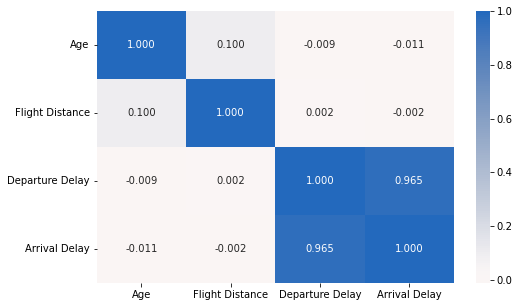

In [117]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_copy[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

df_copy.shape= (129487, 24)
diamonds_samp.shape= (5000, 24)


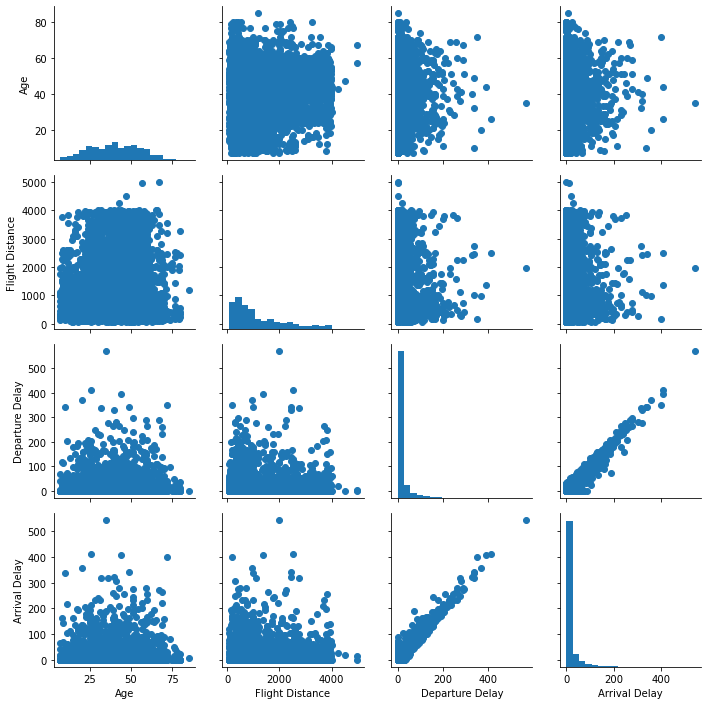

In [118]:
# plot matrix: sample 5000 diamonds so that plots are clearer and they render faster
print("df_copy.shape=",df_copy.shape)
airline_samp = df_copy.sample(n=5000, replace = False)
print("diamonds_samp.shape=",airline_samp.shape)

g = sb.PairGrid(data = airline_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

One can observe that Departure Delay and Arrival Delay are very much correlated with each other

<Figure size 720x720 with 0 Axes>

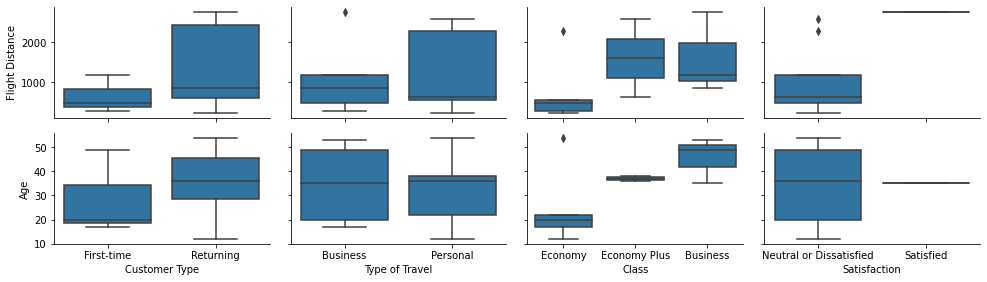

In [119]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

diamonds_samp = df_copy.sample(n=10, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = diamonds_samp, y_vars = ['Flight Distance', 'Age'], x_vars = categoric_vars,
                height = 2, aspect = 1.75)
g.map(boxgrid)
plt.show();

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

The median age of the passengers who uses business type of flight is below 40, whereas the first-time passengers are below 40

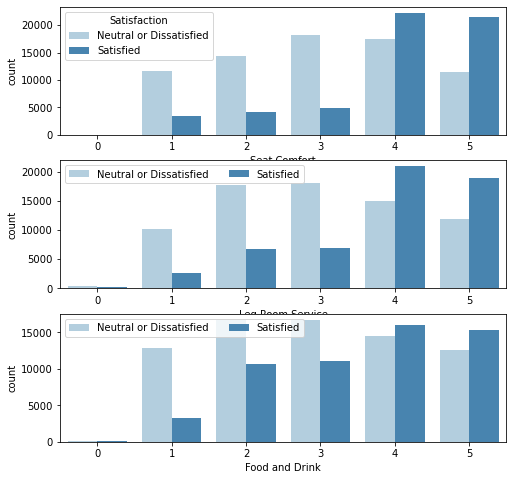

In [120]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: Seat Comfort vs Satisfaction
plt.subplot(3, 1, 1)
sb.countplot(data = df_copy, x = 'Seat Comfort', hue = 'Satisfaction', palette = 'Blues')

# subplot 2: Leg Room Service vs. Satisfaction
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_copy, x = 'Leg Room Service', hue = 'Satisfaction', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: Food and Drink vs. Satisfaction
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_copy, x = 'Food and Drink', hue = 'Satisfaction', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to remove overlapping


plt.show()

The rate of passengers with Seat-comfort, leg-room-service, food and drink above 4 tend to be more satisfied that passengers with less than 4

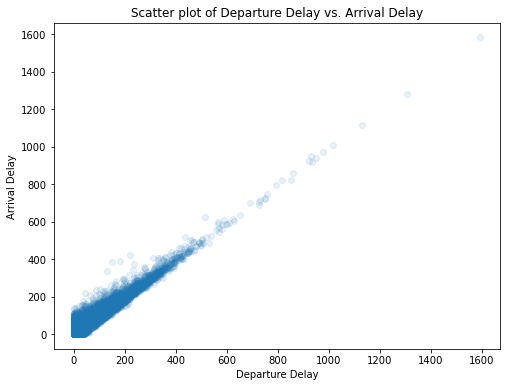

In [121]:
# scatter plot for Departure Delay vs. Arrival Delay

plt.figure(figsize = [8, 6])
plt.scatter(data = df_copy, x = 'Departure Delay', y = 'Arrival Delay', alpha = 1/10)
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title('Scatter plot of Departure Delay vs. Arrival Delay')
plt.show()


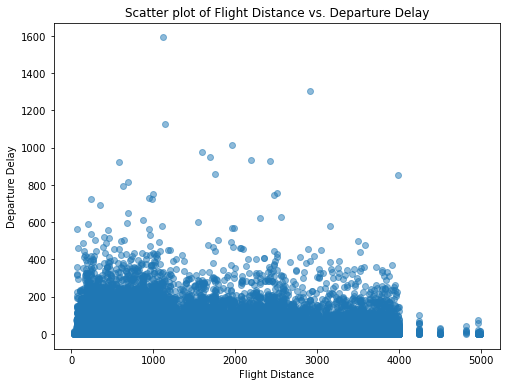

In [122]:
# scatter plot of Flight Distance vs. Departure Delay

plt.figure(figsize = [8, 6])
plt.scatter(data = df_copy, x = 'Flight Distance', y = 'Departure Delay', alpha = 1/2)
plt.xlabel('Flight Distance')
plt.ylabel('Departure Delay')
plt.title('Scatter plot of Flight Distance vs. Departure Delay')
plt.show()

The chart shows no correlation between flight distance and departure delay

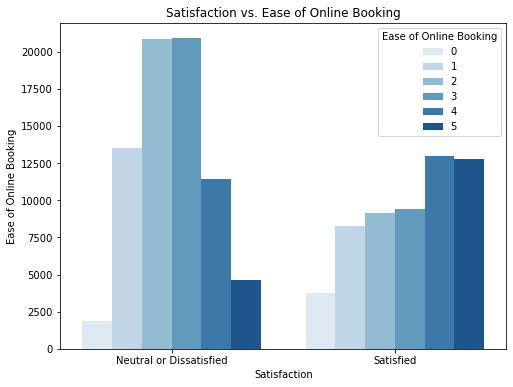

In [123]:
# scatter plot of Departure Delay vs. Arrival Delay

plt.figure(figsize = [8, 6])
#plt.hist(data = df_copy, x = 'Satisfaction', y = 'Customer Type', alpha = 1/2)
sb.countplot(data = df_copy, x = 'Satisfaction', hue = 'Ease of Online Booking', palette = 'Blues')
plt.xlabel('Satisfaction')
plt.ylabel('Ease of Online Booking')
plt.title('Satisfaction vs. Ease of Online Booking')
plt.show()

## Multivariate Exploration

In [124]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [125]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(cuberoot_trans(.2), cuberoot_trans(3.5)+.05, .05)
    bins_y = np.arange(2.4, 4.3+0.1, 0.1)
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)

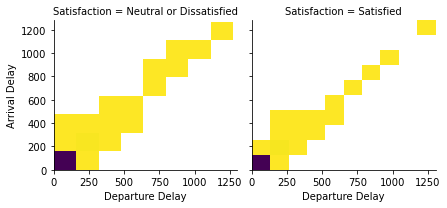

In [130]:
# creating faceted heat maps
g = sb.FacetGrid(data = df_copy, col = 'Satisfaction', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'Departure Delay', 'Arrival Delay', color = 'viridis_r')
g.set_xlabels('Departure Delay')
g.set_ylabels('Arrival Delay')
# , bins = [bins_x, bins_y]
# , xlim = [cuberoot_trans(.20), cuberoot_trans(3.5)]
plt.show()

The cloud of points moves towards the upper left of the plot as the departure delay level and arrival delay level increases.


From the multivariate plot, It was observed that lesser numbers of the passengers were satisfied with high delay and arrival delay and from the heat map, more passengers were dissatified with arrival delay less than 500 minutes and departure delay less than 300 minutes

## Storing Data

In [127]:
# Saving the dataset to a new csv file
df_copy.to_csv("airline_cleaned.csv")

## conclusion

There was a strong correlation between the features 'Departure Delay' and Arrival Delay

The number of men and women is almost the same

majority of the airline's customers are repeat customers